# Part I: Research Question

### A question relevant to a real-world organizational situation that I will answer by using principal component analysis is: can I reduce the dimensions of a dataset without losing signifcant information?

# Part III: Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.dpi'] = 125

In [3]:
churn = pd.read_csv('churn_clean.csv', index_col=0)

In [4]:
churn.reset_index(drop=True, inplace=True)

In [5]:
with pd.option_context('display.max_rows', 6, 'display.max_columns', None): 
    display(churn)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1,39,16667.58,Separated,Male,No,12.071910,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752,4,4,6,4,3,3,5,4
9999,T38070,9de5fb6e-bd33-4995-aec8-f01d0172a499,0ea683a03a3cd544aefe8388aab16176,Clarkesville,GA,Habersham,30523,34.70783,-83.53648,12230,Urban,America/New_York,Personal assistant,1,28,9020.92,Never Married,Male,No,11.754720,17,1,0,No,Month-to-month,Yes,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Electronic Check,63.350860,217.484000,5857.586167,2,2,3,3,3,3,4,1


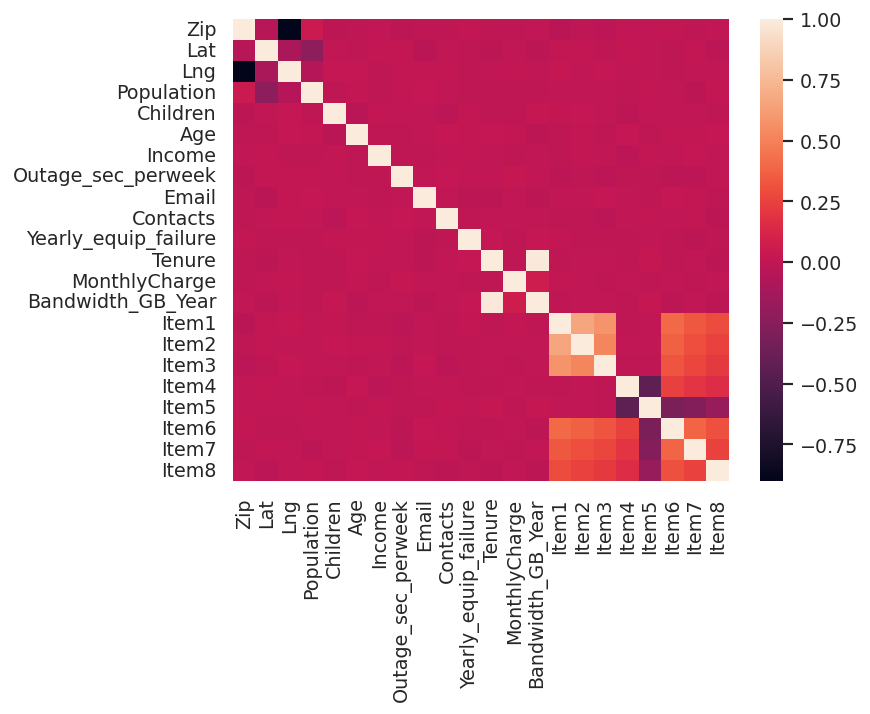

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    corr = churn.corr(numeric_only=True)
    sns.heatmap(corr)

### Renaming 'Item' columns

In [7]:
survey_names = {'Item8': 'Active_listening', 'Item7': 'Courteous_exchange', 'Item6': 'Respectful_response', 'Item5': 'Options',
                'Item4': 'Reliability', 'Item3': 'Timely_replacements', 'Item2': 'Timely_fixes', 'Item1': 'Timely_response'}
churn.rename(columns=survey_names, inplace=True)


In [8]:
surveys = churn.iloc[:, -8:]
surveys

,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Active_listening
0,5,5,5,3,4,4,3,4
1,3,4,3,3,4,3,4,4
2,4,4,2,4,4,3,3,3
3,4,4,4,2,5,4,3,3
4,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...
9995,3,2,3,3,4,3,2,3
9996,4,5,5,4,4,5,2,5
9997,4,4,4,4,4,4,4,5
9998,4,4,6,4,3,3,5,4


### Checking for input errors

In [9]:
surveys.isnull().sum()

Timely_response        0
Timely_fixes           0
Timely_replacements    0
Reliability            0
Options                0
Respectful_response    0
Courteous_exchange     0
Active_listening       0
dtype: int64

In [10]:
surveys.loc[: , ~surveys.isin(range(1,8)).any()]

""
0
1
2
3
4
...
9995
9996
9997
9998


## Standardization

In [11]:
scaler = StandardScaler(with_mean=True, with_std=True)
surveys_standardized = scaler.fit_transform(surveys)

In [12]:
surveys_standardized

array([[ 1.45430672,  1.44492188,  1.47189644, ...,  0.48638938,
        -0.49540563,  0.49038392],
       [-0.47294841,  0.4783543 , -0.47376971, ..., -0.48116458,
         0.47693123,  0.49038392],
       [ 0.49067916,  0.4783543 , -1.44660278, ..., -0.48116458,
        -0.49540563, -0.48182845],
       ...,
       [ 0.49067916,  0.4783543 ,  0.49906337, ...,  0.48638938,
         0.47693123,  1.46259628],
       [ 0.49067916,  0.4783543 ,  2.44472951, ..., -0.48116458,
         1.44926808,  0.49038392],
       [-1.43657597, -1.45478087, -0.47376971, ..., -0.48116458,
         0.47693123, -2.42625317]])

In [13]:
cleaned_data = pd.DataFrame(surveys_standardized, columns=surveys.columns)

In [14]:
cleaned_data.to_csv('PA2_cleaned_data.csv')

# Part IV: Analysis

In [15]:
pca = PCA()
pca.fit(surveys_standardized)

PCA()

In [16]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings,
                              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'],
                              index=surveys.columns)
loading_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Timely_response,0.788038,0.361794,-0.061255,0.099907,-0.034462,0.018369,-0.167948,0.452477
Timely_fixes,0.745654,0.365126,-0.094031,0.141716,-0.049977,0.054798,-0.411092,-0.327660
Timely_replacements,0.688029,0.362092,-0.153875,0.212022,-0.114073,-0.291162,0.467946,-0.101057
Reliability,0.250105,-0.729299,-0.151786,0.401880,-0.342442,0.316373,0.060429,0.010617
Options,-0.301091,0.756678,0.119743,-0.050702,-0.162507,0.508952,0.184337,-0.023502
Respectful_response,0.695620,-0.235333,-0.054854,-0.053038,0.583071,0.296250,0.161043,-0.036580
Courteous_exchange,0.615304,-0.231712,-0.163637,-0.671597,-0.291386,0.049497,0.045893,-0.022995
Active_listening,0.530218,-0.169719,0.824411,0.007683,-0.088038,-0.032868,0.032150,-0.024245


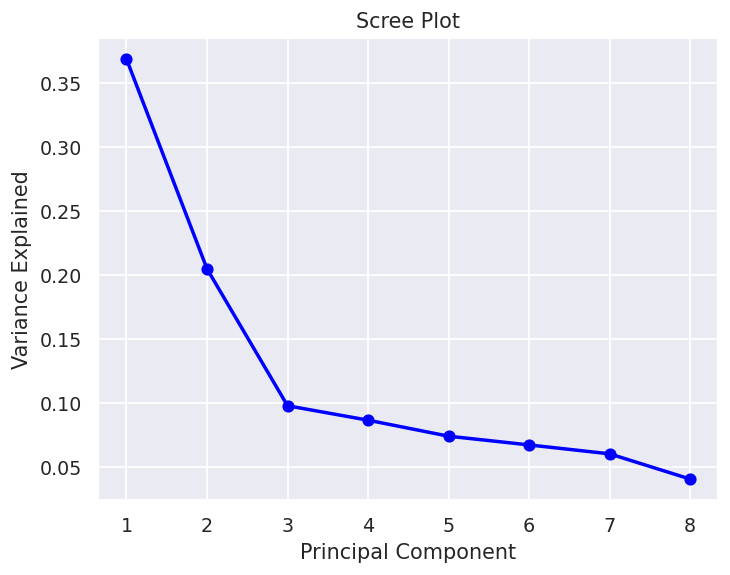

In [17]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
pca = PCA(n_components=3)
pca.fit(surveys_standardized)

PCA(n_components=3)

In [19]:
print('The variance of each of the principal components is:')
print(pca.explained_variance_)

The variance of each of the principal components is:
[2.94721431 1.63763946 0.78308791]


In [20]:
print('The total variance captured by the principal components is:')
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_))

The total variance captured by the principal components is:
5.367941686803192
0.6709256115793139


In [21]:
components = pd.DataFrame(pca.components_, columns=surveys.columns.values, index=['PC1', 'PC2', 'PC3'])
components

,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Active_listening
PC1,0.459030,0.434342,0.400775,0.145686,-0.175385,0.405197,0.358413,0.308851
PC2,0.282717,0.285321,0.282950,-0.569898,0.591292,-0.183897,-0.181067,-0.132624
PC3,-0.069221,-0.106259,-0.173885,-0.171525,0.135315,-0.061988,-0.184917,0.931619
